# Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Dataset :- https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

Step 1: Import Necessary Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree


Here, we import the required libraries including pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for visualization, and various modules from sklearn for machine learning tasks.

Step 2: Load the Dataset

In [12]:
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\bank.csv")


Step 3: Data Cleaning and Preprocessing

In [13]:
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


This checks for missing values in the dataset. In this case, it appears that there are no missing values.

In [14]:
data = data[data['poutcome'] != 'unknown']


This filters out rows where the 'poutcome' column has the value 'unknown'.

In [15]:
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


This encodes categorical variables using Label Encoding. It converts categorical labels into numeric form.

Step 4: Exploratory Data Analysis (EDA)

Visualization 1: Count of Deposits

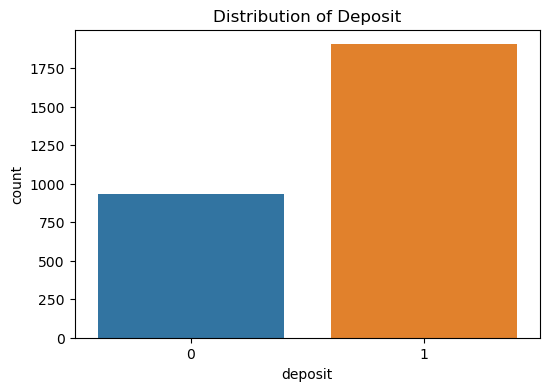

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=data)
plt.title('Distribution of Deposit')
plt.show()


Inference: The plot shows that there is a relatively balanced distribution between 'yes' and 'no' in the 'deposit' variable. The dataset is not heavily skewed towards one class.

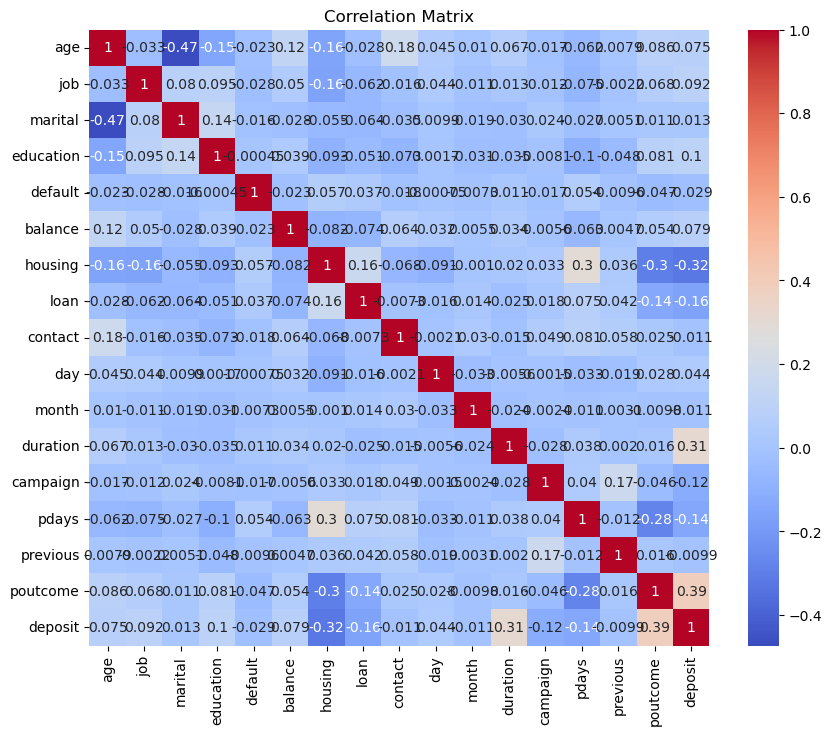

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This visualizes the correlation matrix as a heatmap. It shows the relationships between different features.

Inference: The correlation matrix heatmap helps us identify any notable correlations between features. Closer to 1 or -1 indicates stronger correlation, while values closer to 0 indicate weaker correlation.

Visualization 2: Age Distribution

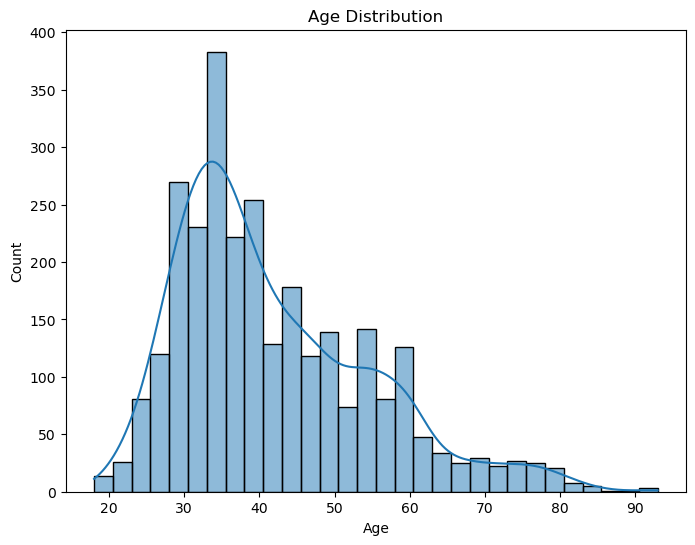

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


Inference: The age distribution is right-skewed, with the majority of customers falling in the age range of 30 to 60. There are also some outliers with higher ages.



Visualization 3: Education Levels

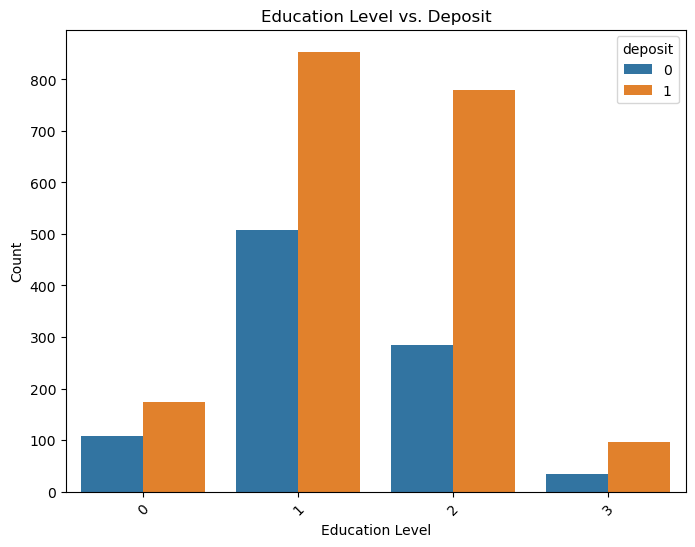

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=data, hue='deposit')
plt.title('Education Level vs. Deposit')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Inference: Customers with 'tertiary' education tend to have a higher likelihood of making a deposit, followed by those with 'secondary' education. Customers with 'primary' education have the lowest likelihood.

Visualization 4: Marital Status

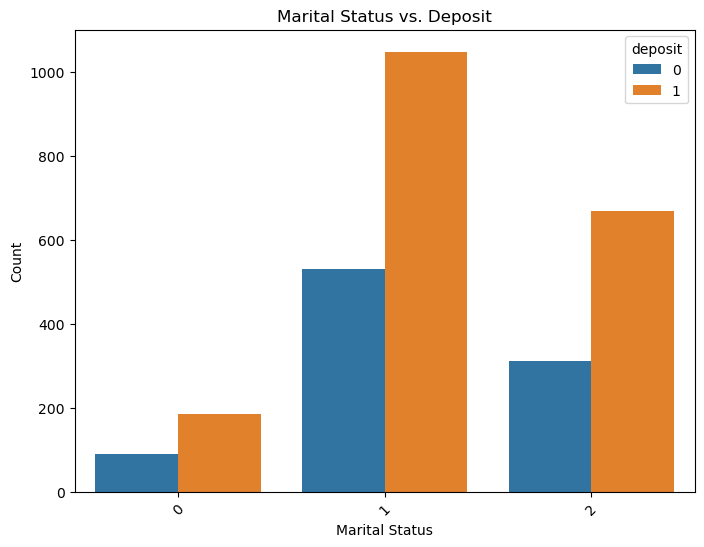

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=data, hue='deposit')
plt.title('Marital Status vs. Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Inference: Married customers and single customers have a higher likelihood of making a deposit compared to divorced customers.

Visualization 5: Campaign vs. Deposit

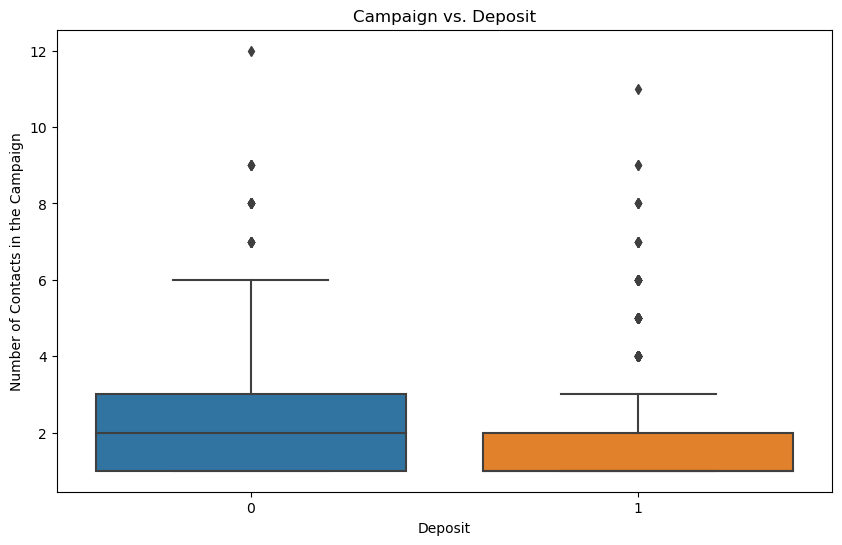

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='campaign', data=data)
plt.title('Campaign vs. Deposit')
plt.xlabel('Deposit')
plt.ylabel('Number of Contacts in the Campaign')
plt.show()


Inference: Customers who made a deposit generally had a lower number of contacts in the campaign. This suggests that too many contacts may discourage customers from making a deposit.

Visualization 6: Contact Method vs. Deposit

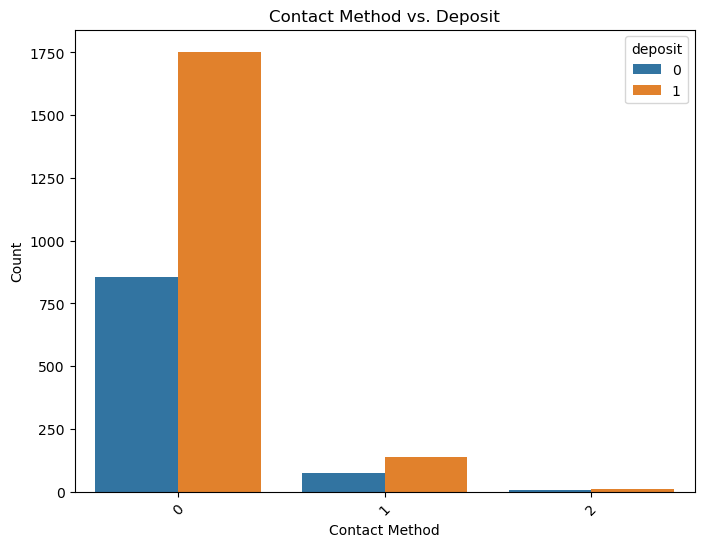

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', data=data, hue='deposit')
plt.title('Contact Method vs. Deposit')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Inference: Customers contacted through 'cellular' communication have a higher likelihood of making a deposit compared to those contacted through 'telephone.'

These visualizations provide valuable insights into the dataset and can help in understanding the relationships between different variables and their impact on the target variable ('deposit').

Step 5: Splitting the Data

In [24]:
X = data.drop('deposit', axis=1)
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This splits the dataset into features (X) and target (y), then further into training and testing sets.

Step 6: Build the Decision Tree Classifier

In [25]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

This initializes and trains the Decision Tree Classifier.

Step 7: Model Evaluation

In [26]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


This evaluates the model by making predictions on the test set and calculating metrics like accuracy, confusion matrix, and classification report.

Step 8: Visualize the Decision Tree

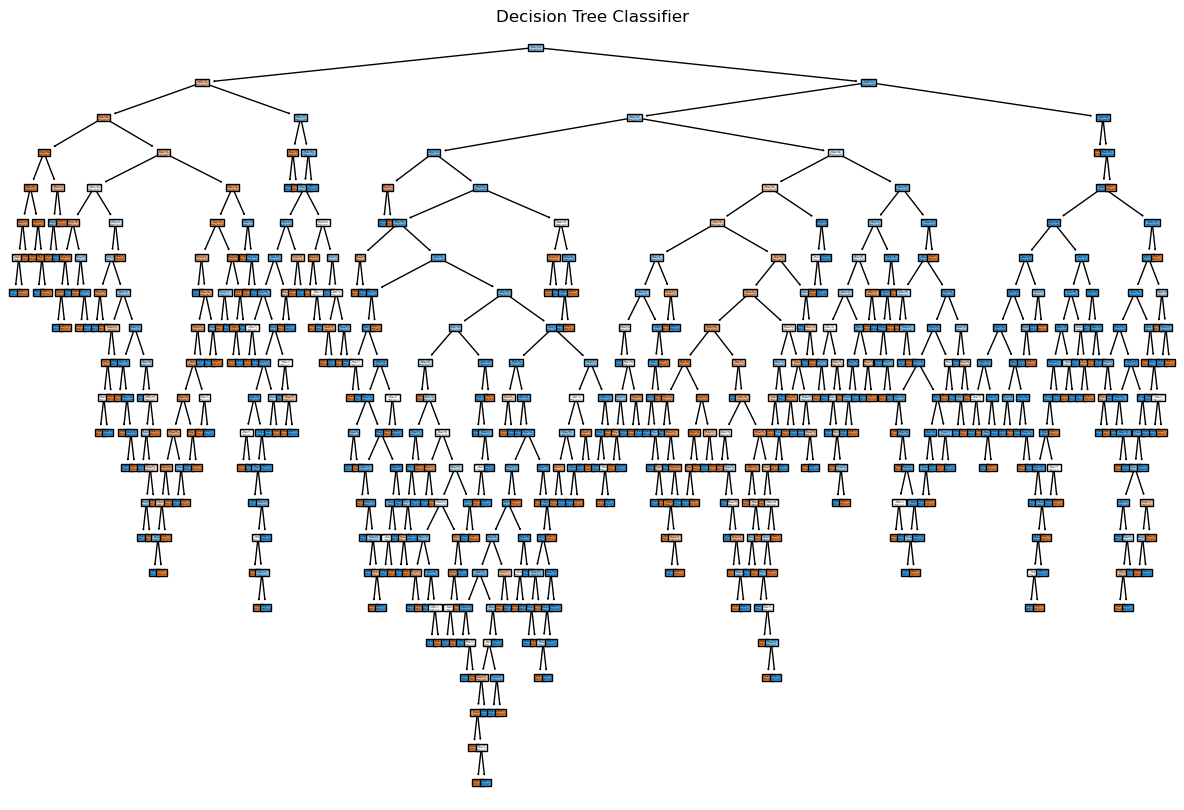

In [27]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()


This plots the decision tree, displaying the rules and decisions made by the model.

Inference: The decision tree provides a visual representation of how the model makes decisions based on features.

In [31]:
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.76
Confusion Matrix:
[[113  67]
 [ 71 317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       180
           1       0.83      0.82      0.82       388

    accuracy                           0.76       568
   macro avg       0.72      0.72      0.72       568
weighted avg       0.76      0.76      0.76       568

